In [1]:
import sys 
sys.path.append("..") 

#from topological_models import generator
import numpy as np
from topology_model import NonHermitianHamiltonian, NonHermitianTopologicalModel
import matplotlib.pyplot as plt
import matplotlib
from machine_learning import Cluster
from machine_learning import Classifier
from topology_model import sigma_0, sigma_x, sigma_y, sigma_z
from topology_model import Generator
from topology_model import topology_comparator

from tools import save_data, save_data_M

In [6]:
class HatanoNelson1D(NonHermitianHamiltonian):
    def __init__(self, E_ref=0.):
        super().__init__(E_ref)
        self.Js = None
        self.initiate()

    def get_n(self):
        return 1

    def get_n_dim(self):
        return 1

    def get_parameters(self):
        return self.Js
    
    def set_parameters(self, **kwargs):
        self.Js = kwargs['J1'], kwargs['J2']

    def initiate(self):
        # J1 = np.random.random()
        # J2 = np.random.random()
        J1 = 1.
        J2 = 2*np.random.random()
        self.Js = J1, J2

    def get_kpoints(self):
        n_points = 11
        kpoints = [[k] for k in np.linspace(0,np.pi,n_points)]
        return kpoints
    
    def get_Hamiltonian(self, k):
        k = k[0]
        J1, J2 = self.Js
        hk = np.zeros(1, dtype=complex)
        hk = hk + J1*np.exp(-1j*k) + J2*np.exp(1j*k) - self.E_ref
        
        return hk

    def get_topological_invariant(self):
        J1, J2 = self.Js
        if J1 > J2:
            return -1
        elif J1 < J2:
            return 1
        else:
            return 0

# $E_f = 0.5i$

The number of centers:  2


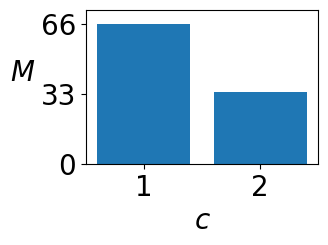

In [9]:
gap_type = 'point'
E_ref = 0.5j
generator = Generator(hamiltonian=HatanoNelson1D(E_ref=E_ref), gap_type=gap_type)

n_sample = 100
#models, vs = generator.generate_models(n_sample)
models, vs = generator.generate_models(n_sample)
n = generator.get_n()

cluster = Cluster(similarity_function= topology_comparator,  verbose=False)
center_indices, group_number = cluster.fit(models)
print("The number of centers: ", len(center_indices))

plt.figure(figsize=(3,2))
plt.bar(np.arange(len(group_number))+1, group_number)
plt.xlim([0.5,len(group_number)+0.5])
plt.xticks(list(range(1,len(group_number)+1)),fontsize=20)
plt.ylim([0, np.max(group_number)*1.1])
plt.yticks([0, int(np.max(group_number)/2), int(np.max(group_number))],fontsize=20)
plt.xlabel(r"$c$",fontsize=20)
plt.ylabel(r"$M$",fontsize=20,rotation=0,horizontalalignment='right')
plt.show()

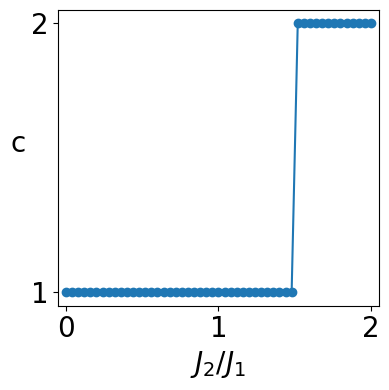

In [10]:
classifier = Classifier(similarity_func=topology_comparator, cluster_centers=[models[index] for index in center_indices])
n1 = 51
J1 = 1.0
J2s = np.linspace(0.001,2,n1)
v_list = np.zeros(n1)

for i in range(n1):
    hamiltonian = HatanoNelson1D(E_ref=E_ref)
    hamiltonian.set_parameters(J1=J1, J2=J2s[i])
    _model = NonHermitianTopologicalModel(hamiltonian=hamiltonian, gap_type=gap_type)
    v_list[i] = classifier.classify(_model)

plt.figure(figsize=(4,4))
plt.plot(J2s, v_list,'-o')
plt.xticks([0, 1, 2],fontsize=20)
plt.yticks(range(1, len(group_number)+1),fontsize=20)
plt.xlim([-0.05, 2.05])
plt.ylim([1-0.05,len(group_number)+.05])
plt.xlabel(r"$J_2/J_1$",fontsize=20)
plt.ylabel(r"c",fontsize=20,rotation=0,horizontalalignment='right')

plt.tight_layout()
plt.show()

# $E_f = 3.$

The number of centers:  1


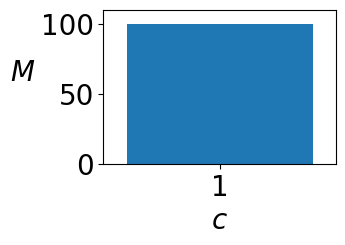

In [11]:
gap_type = 'point'
E_ref = 3.
generator = Generator(hamiltonian=HatanoNelson1D(E_ref=E_ref), gap_type=gap_type)

n_sample = 100
#models, vs = generator.generate_models(n_sample)
models, vs = generator.generate_models(n_sample)
n = generator.get_n()

cluster = Cluster(similarity_function= topology_comparator,  verbose=False)
center_indices, group_number = cluster.fit(models)
print("The number of centers: ", len(center_indices))

plt.figure(figsize=(3,2))
plt.bar(np.arange(len(group_number))+1, group_number)
plt.xlim([0.5,len(group_number)+0.5])
plt.xticks(list(range(1,len(group_number)+1)),fontsize=20)
plt.ylim([0, np.max(group_number)*1.1])
plt.yticks([0, int(np.max(group_number)/2), int(np.max(group_number))],fontsize=20)
plt.xlabel(r"$c$",fontsize=20)
plt.ylabel(r"$M$",fontsize=20,rotation=0,horizontalalignment='right')
plt.show()

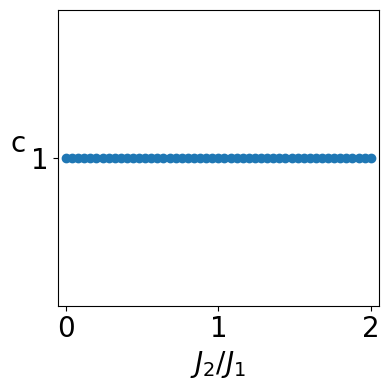

In [13]:
classifier = Classifier(similarity_func=topology_comparator, cluster_centers=[models[index] for index in center_indices])
n1 = 51
J1 = 1.0
J2s = np.linspace(0.001,1.999,n1)
v_list = np.zeros(n1)

for i in range(n1):
    hamiltonian = HatanoNelson1D(E_ref=E_ref)
    hamiltonian.set_parameters(J1=J1, J2=J2s[i])
    _model = NonHermitianTopologicalModel(hamiltonian=hamiltonian, gap_type=gap_type)
    v_list[i] = classifier.classify(_model)

plt.figure(figsize=(4,4))
plt.plot(J2s, v_list,'-o')
plt.xticks([0, 1, 2],fontsize=20)
plt.yticks(range(1, len(group_number)+1),fontsize=20)
plt.xlim([-0.05, 2.05])
plt.ylim([1-0.05,len(group_number)+.05])
plt.xlabel(r"$J_2/J_1$",fontsize=20)
plt.ylabel(r"c",fontsize=20,rotation=0,horizontalalignment='right')

plt.tight_layout()
plt.show()

# $E_f = 0.8-0.4j $

The number of centers:  2


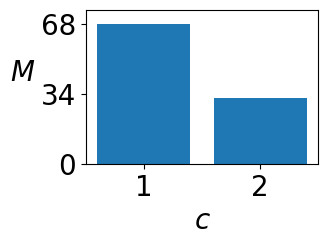

In [14]:
gap_type = 'point'
E_ref = 0.8-0.4j
generator = Generator(hamiltonian=HatanoNelson1D(E_ref=E_ref), gap_type=gap_type)

n_sample = 100
#models, vs = generator.generate_models(n_sample)
models, vs = generator.generate_models(n_sample)
n = generator.get_n()

cluster = Cluster(similarity_function= topology_comparator,  verbose=False)
center_indices, group_number = cluster.fit(models)
print("The number of centers: ", len(center_indices))

plt.figure(figsize=(3,2))
plt.bar(np.arange(len(group_number))+1, group_number)
plt.xlim([0.5,len(group_number)+0.5])
plt.xticks(list(range(1,len(group_number)+1)),fontsize=20)
plt.ylim([0, np.max(group_number)*1.1])
plt.yticks([0, int(np.max(group_number)/2), int(np.max(group_number))],fontsize=20)
plt.xlabel(r"$c$",fontsize=20)
plt.ylabel(r"$M$",fontsize=20,rotation=0,horizontalalignment='right')
plt.show()

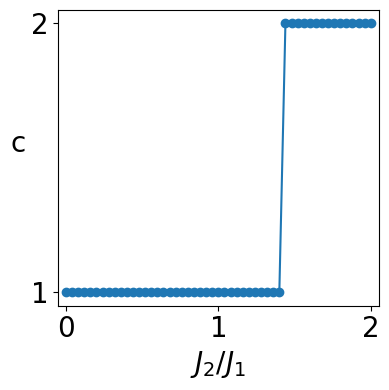

In [15]:
classifier = Classifier(similarity_func=topology_comparator, cluster_centers=[models[index] for index in center_indices])
n1 = 51
J1 = 1.0
J2s = np.linspace(0.001,1.999,n1)
v_list = np.zeros(n1)

for i in range(n1):
    hamiltonian = HatanoNelson1D(E_ref=E_ref)
    hamiltonian.set_parameters(J1=J1, J2=J2s[i])
    _model = NonHermitianTopologicalModel(hamiltonian=hamiltonian, gap_type=gap_type)
    v_list[i] = classifier.classify(_model)

plt.figure(figsize=(4,4))
plt.plot(J2s, v_list,'-o')
plt.xticks([0, 1, 2],fontsize=20)
plt.yticks(range(1, len(group_number)+1),fontsize=20)
plt.xlim([-0.05, 2.05])
plt.ylim([1-0.05,len(group_number)+.05])
plt.xlabel(r"$J_2/J_1$",fontsize=20)
plt.ylabel(r"c",fontsize=20,rotation=0,horizontalalignment='right')

plt.tight_layout()
plt.show()